In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
from seleniumbase import Driver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Create an empty list to store job data
job_detail = []

# Initialize the SeleniumBase driver
driver = Driver()

# Loop through multiple pages of job listings (2 to 51)
for i in range(2, 52):
    # Construct the URL for the job listings page
    url = f'https://www.naukri.com/data-science-jobs{-i}?k=data%20science'

    # Navigate to the job listings page
    driver.get(url)

    # Set an implicit wait time of 20 seconds for elements to load
    driver.implicitly_wait(20)

    # Find all the job listing elements on the page
    job_wrappers = driver.find_elements(By.CLASS_NAME, "srp-jobtuple-wrapper")

    # Loop through each job listing
    for job in job_wrappers:
        try:
            # Extract the job title
            title = job.find_element(By.CLASS_NAME, "title").text
        except Exception as e:
            title = np.nan

        try:
            # Extract company name, rating, and reviews
            cname_rating_rev = job.find_element(By.CLASS_NAME, "row2").text.split('\n')
            company_name = cname_rating_rev[0]
            rating = cname_rating_rev[1]
            reviews = cname_rating_rev[2]
        except Exception as e:
            company_name = np.nan
            rating = np.nan
            reviews = np.nan

        try:
            # Extract experience, salary, and location
            exp_sal_loc = job.find_element(By.CLASS_NAME, 'row3').text.split("\n")
            exp = exp_sal_loc[0]
            sal = exp_sal_loc[1]
            loc = exp_sal_loc[-1]
        except Exception as e:
            exp = np.nan
            sal = np.nan
            loc = np.nan

        # Append the job data to the list
        job_detail.append({
            'Title': title,
            'Company Name': company_name,
            'Rating': rating,
            'Reviews': reviews,
            'Experience': exp,
            'Salary': sal,
            'Location': loc
        })

    # Pause for 15 seconds to avoid overloading the website
    time.sleep(15)

# Close the SeleniumBase driver
driver.close()


In [ ]:
jobs = pd.DataFrame(job_detail)

In [ ]:
jobs.shape

(1000, 7)

In [ ]:
jobs.head()

,Title,Company Name,Rating,Reviews,Experience,Salary,Location
0,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,6413 Reviews,12-20 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru"
1,Consultant - Data Science DT,Eli Lilly And Company,4.2,320 Reviews,1-5 Yrs,Not disclosed,Bangalore/Bengaluru
2,Analyst - Data Science,Marsh McLennan Companies,4.1,465 Reviews,1-3 Yrs,Not disclosed,Mumbai
3,Analyst - Data Science,Jardine Lloyd Thompson,4.1,465 Reviews,1-3 Yrs,Not disclosed,Mumbai
4,Data Science Domain Manager,Coursera,3.9,17 Reviews,7-11 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder..."


In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Company Name  717 non-null    object
 2   Rating        717 non-null    object
 3   Reviews       717 non-null    object
 4   Experience    1000 non-null   object
 5   Salary        1000 non-null   object
 6   Location      1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
# removing duplicate rows
jobs  = jobs[~ jobs.duplicated()]

In [ ]:
# Remove missing values's row because in 283 rows company name is missing.
jobs =  jobs[~jobs['Company Name'].isna()].reset_index(drop=True)

In [ ]:
jobs[['Review','col1']] = jobs['Reviews'].str.split(' ',1,expand=True)
jobs[['min_exp','col2']] = jobs['Experience'].str.split('-',1,expand=True)
jobs = jobs.drop(['Reviews','Experience','col1','col2'],axis=1)

In [ ]:
jobs

,Title,Company Name,Rating,Salary,Location,Review,min_exp
0,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413,12
1,Consultant - Data Science DT,Eli Lilly And Company,4.2,Not disclosed,Bangalore/Bengaluru,320,1
2,Analyst - Data Science,Marsh McLennan Companies,4.1,Not disclosed,Mumbai,465,1
3,Analyst - Data Science,Jardine Lloyd Thompson,4.1,Not disclosed,Mumbai,465,1
4,Data Science Domain Manager,Coursera,3.9,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",17,7
...,...,...,...,...,...,...,...
706,Data Analyst,Medtronic,4.0,Not disclosed,Hyderabad/Secunderabad,426,4
707,SRM Data Analyst,General Mills,4.2,Not disclosed,Mumbai,615,1
708,Data Analyst,SVKM's Narsee Monjee Institute of Management S...,4.5,Not disclosed,Mumbai,11,3
709,Data Analyst,Rpa Infotech,3.0,Not disclosed,Gurgaon/Gurugram,16,1


In [ ]:
jobs.min_exp.unique()

array(['12', '1', '7', '5', '3', '8', '10', '4', '2', '0', '6',
       'No fixed duration', '6 months duration', '11', '9', '15',
       '3 months duration', '16', 'MS/M.Sc(Science), MCA, B.Tech/B.E.',
       'Any Graduate'], dtype=object)

In [ ]:
incorrect_exp = ['MS/M.Sc(Science), MCA, B.Tech/B.E.','3 months duration','No fixed duration','6 months duration','3 months duration','Any Graduate']

In [ ]:
jobs  =  jobs[~jobs['min_exp'].isin(incorrect_exp)].reset_index(drop=True)

In [ ]:
jobs

,Title,Company Name,Rating,Salary,Location,Review,min_exp
0,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413,12
1,Consultant - Data Science DT,Eli Lilly And Company,4.2,Not disclosed,Bangalore/Bengaluru,320,1
2,Analyst - Data Science,Marsh McLennan Companies,4.1,Not disclosed,Mumbai,465,1
3,Analyst - Data Science,Jardine Lloyd Thompson,4.1,Not disclosed,Mumbai,465,1
4,Data Science Domain Manager,Coursera,3.9,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",17,7
...,...,...,...,...,...,...,...
696,Data Analyst,Medtronic,4.0,Not disclosed,Hyderabad/Secunderabad,426,4
697,SRM Data Analyst,General Mills,4.2,Not disclosed,Mumbai,615,1
698,Data Analyst,SVKM's Narsee Monjee Institute of Management S...,4.5,Not disclosed,Mumbai,11,3
699,Data Analyst,Rpa Infotech,3.0,Not disclosed,Gurgaon/Gurugram,16,1



### The most common job titles in the dataset

In [ ]:
top_10_job_title = pd.DataFrame(df['Title'].value_counts()[:10]).rename(columns={'Title':'Count'})
top_10_job_title

,Count
Data Scientist,97
Data Analyst,86
Senior Data Scientist,28
Senior Data Analyst,16
Lead Data Scientist,11
Data Science Manager,8
Data Science Engineer,7
Data Science Professional,7
Sr. Data Scientist,5
Data Science Lead,4


- In this dataset most common job titles are **Data Scientist** then **Data Analyst**.

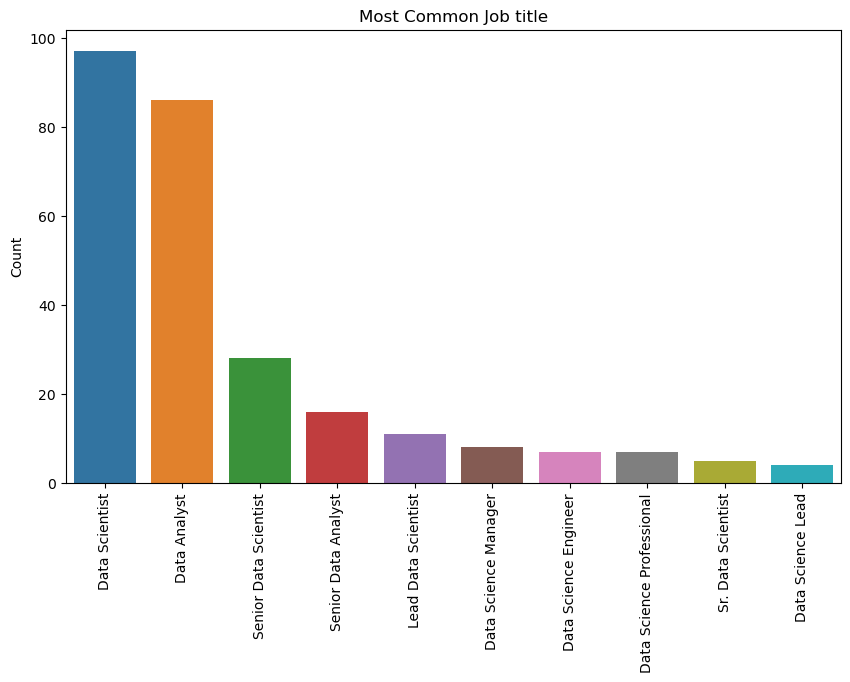

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=top_10_job_title,x=top_10_job_title.index,y='Count')
plt.xticks(rotation=90)
plt.title('Most Common Job title')
plt.show()

###  Top 10  most common companies offering data science jobs

In [ ]:
pd.DataFrame(jobs['Company Name'].value_counts()[:10])

,Company Name
Siemens,15
Tiger Analytics,12
Coders Brain Pvt Ltd,10
Response Informatics,10
Deutsche Bank,7
Essenware,7
IBM,6
GSK India,6
KPMG Global Services Private Limited,6
PwC,6


### Distribution of company ratings in the dataset

In [ ]:
df['Rating'] = df['Rating'].astype('float')

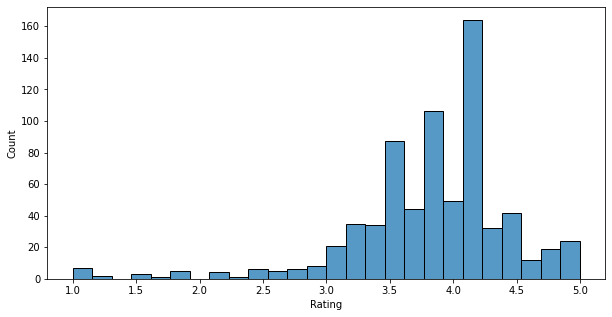

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Rating')
plt.show()

From the distribution of rating of company ,we can say mostly companies have 3 to 4.5 rating.

### Distribution of salary

In [ ]:
pd.DataFrame(jobs.Salary.value_counts())[:5]

,Salary
Not disclosed,641
"Less than 5,000-5,000 PA",2
5-8 Lacs PA,2
3-4 Lacs PA,2
4-6 Lacs PA,2


In This table of salary Distribution we notice that mostly companies does'not disclose salary.

### majority of data science jobs located

In [ ]:
top_10_location = jobs.groupby('Location',as_index=False)['Title'].count().rename(columns={'Title':'count of Jobs'}).sort_values('count of Jobs',ascending=False)[:7].reset_index(drop=True)
top_10_location

,Location,count of Jobs
0,Bangalore/Bengaluru,176
1,Mumbai,61
2,Hyderabad/Secunderabad,54
3,Remote,42
4,Pune,38
5,Chennai,30
6,Gurgaon/Gurugram,30


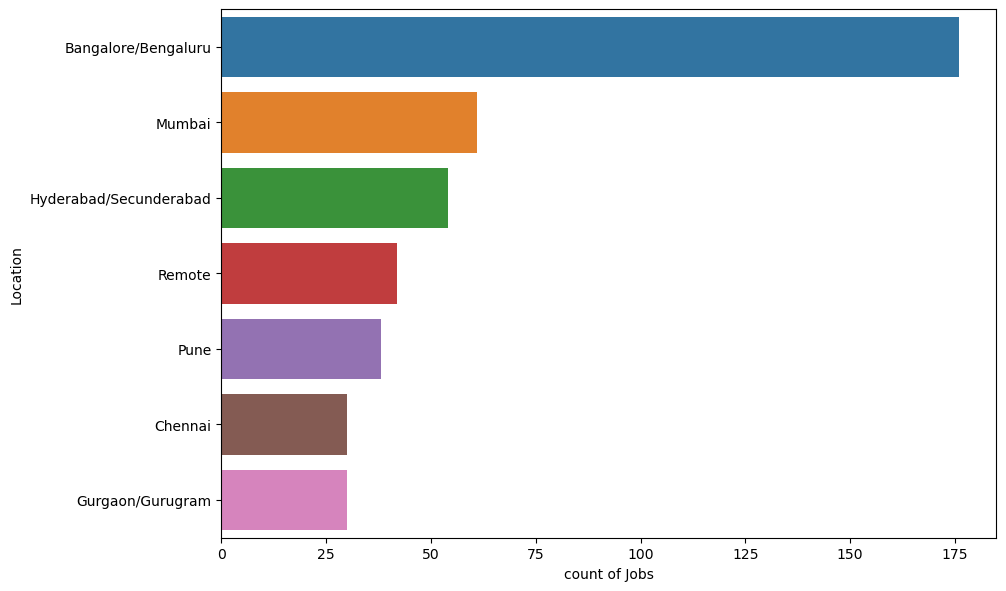

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
sns.barplot(data=top_10_location,y='Location',x='count of Jobs')
plt.show()

- From this chart Bangalore has maximum number of jobs in data science field.